In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as splt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,brier_score_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score,classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
%pip install lime
import lime
from lime import lime_tabular

#**Data Upload**

In [ ]:
#loading the csv data to a Pandas DataFrame
brain_stroke = pd.read_csv('/content/full_data_brain.csv')

In [ ]:
# print first five rows of the dataframe
brain_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
#number of rows and columns in the dataset
brain_stroke.shape

(5026, 11)

In [ ]:
brain_stroke['stroke'].value_counts()

0    4572
1     454
Name: stroke, dtype: int64

In [ ]:
brain_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026 entries, 0 to 5025
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5026 non-null   object 
 1   age                5026 non-null   float64
 2   hypertension       5026 non-null   int64  
 3   heart_disease      5026 non-null   int64  
 4   ever_married       5026 non-null   object 
 5   work_type          5026 non-null   object 
 6   Residence_type     5026 non-null   object 
 7   avg_glucose_level  5026 non-null   float64
 8   bmi                5026 non-null   float64
 9   smoking_status     5026 non-null   object 
 10  stroke             5026 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 432.0+ KB


In [ ]:
brain_stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
brain_stroke.duplicated().sum()

0

In [ ]:
brain_stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# ***Data Visualization***

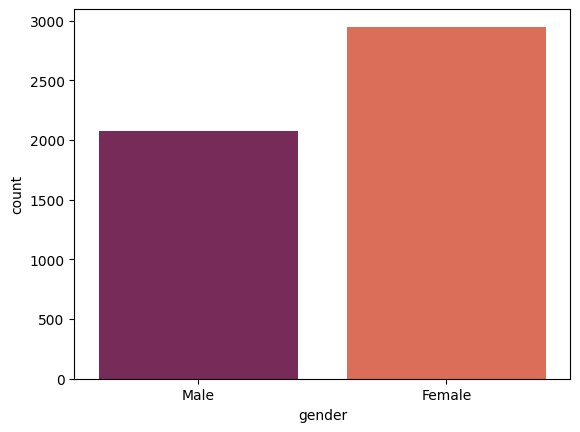

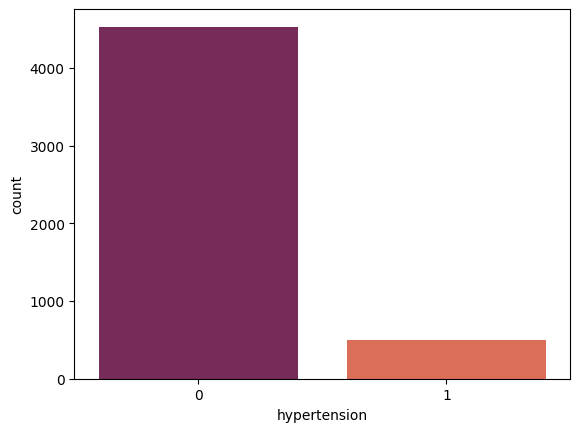

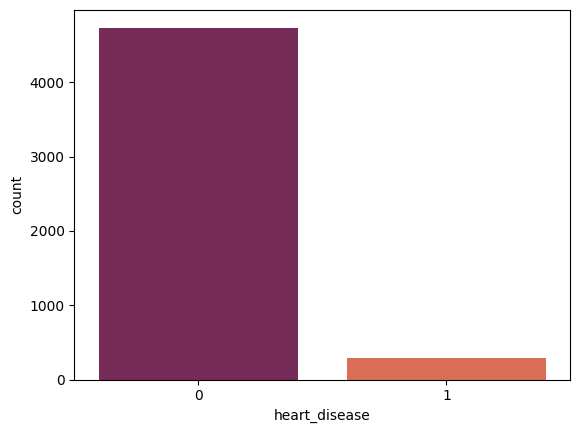

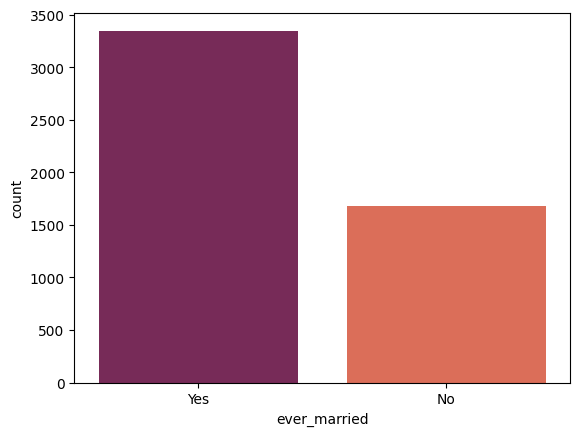

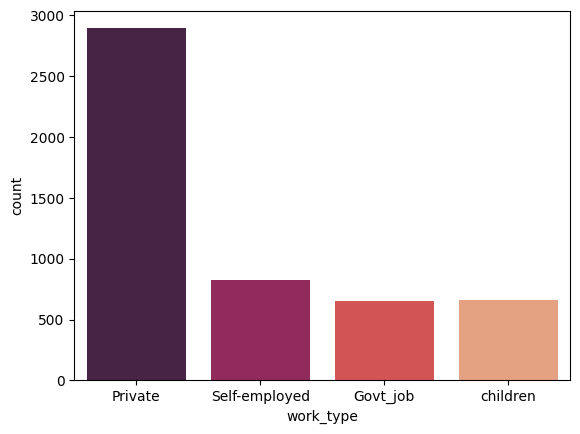

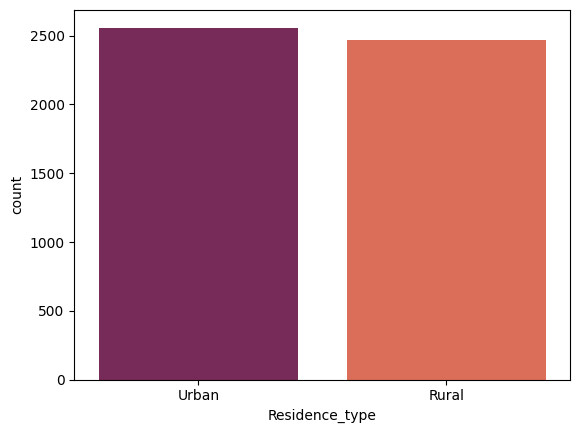

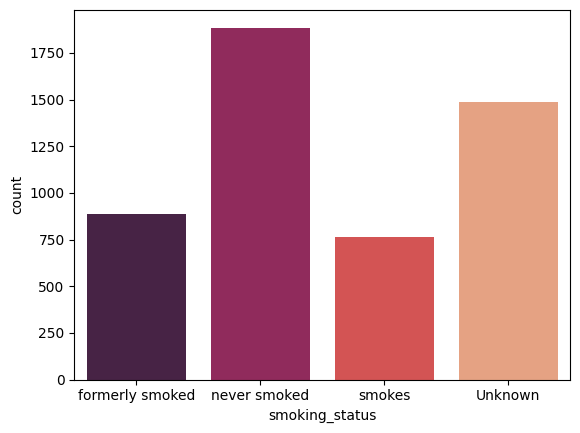

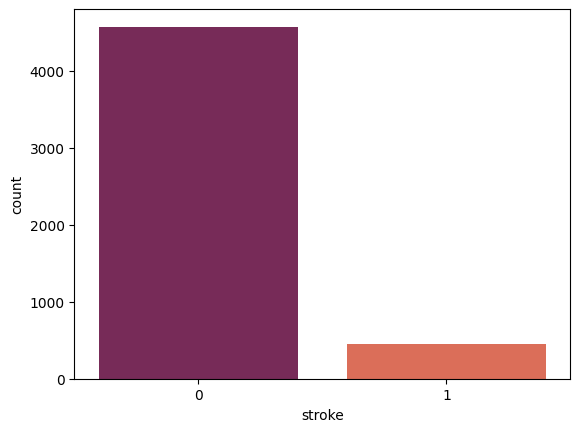

In [ ]:
for i in brain_stroke.columns:
    if i == 'bmi' or i == 'age' or i == 'avg_glucose_level':
        continue
    else:
        seaborn.countplot(data=brain_stroke, x = i,palette = 'rocket')
        plt.show()
        print("\n")

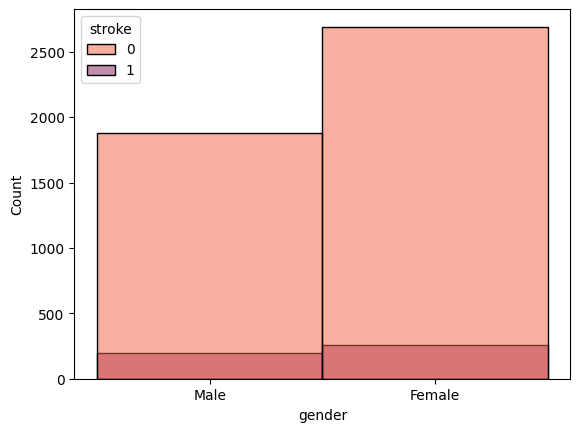

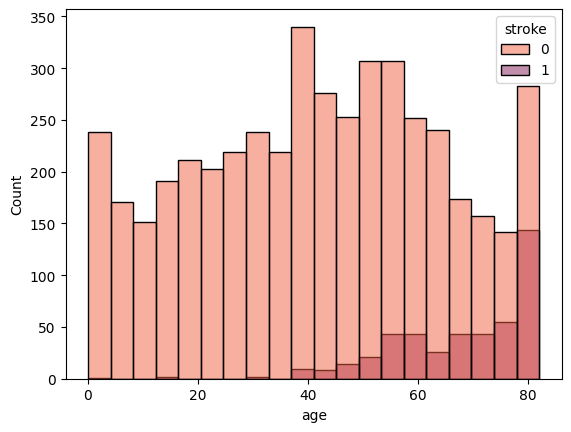

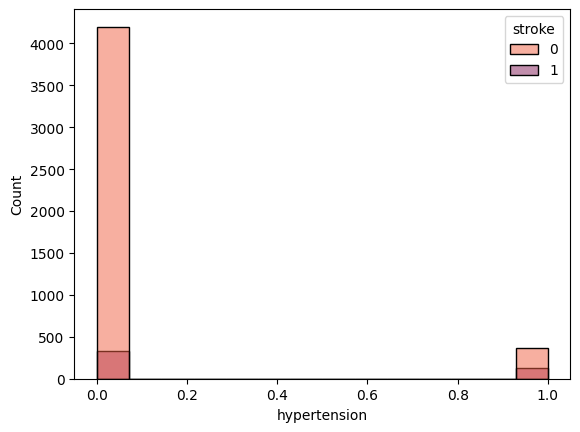

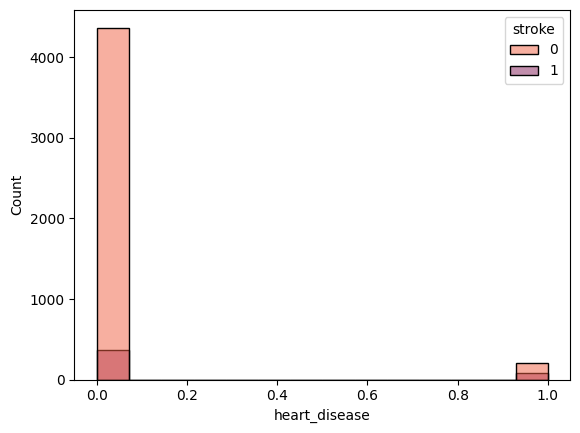

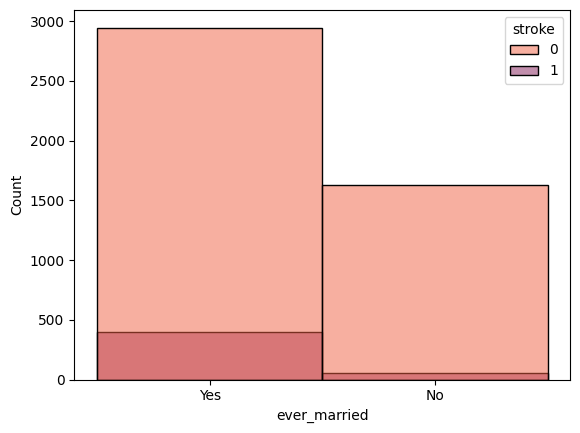

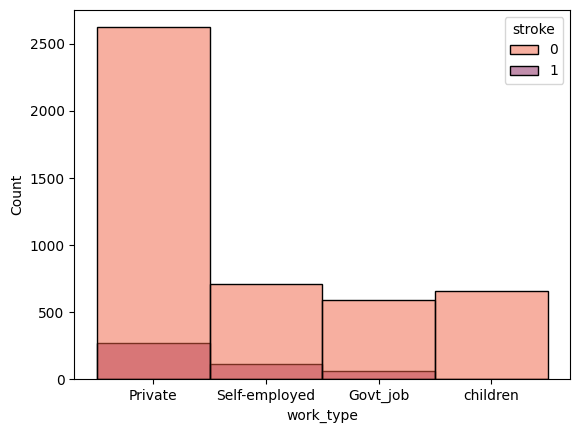

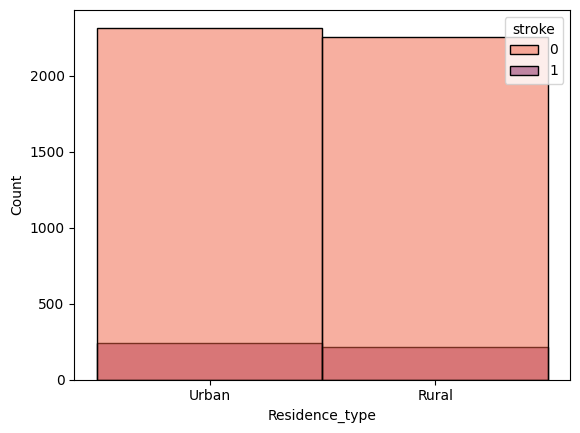

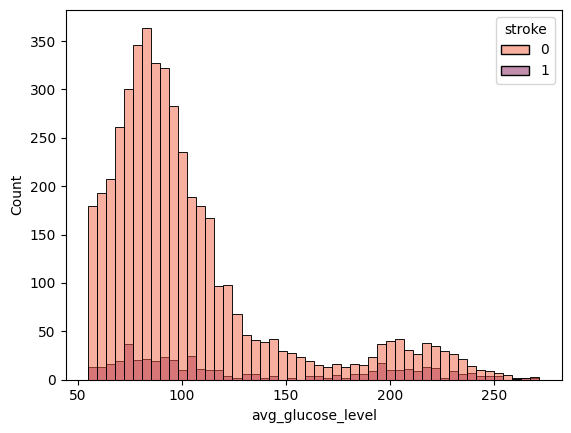

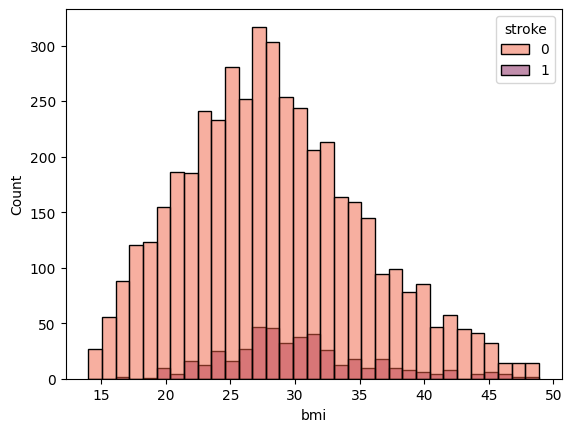

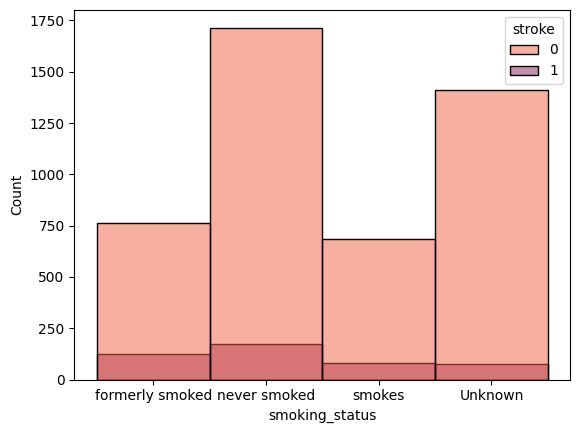

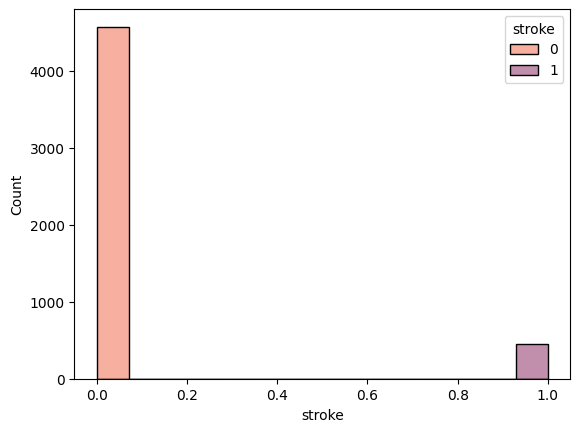

In [ ]:
for i in brain_stroke.columns:
    seaborn.histplot(data=brain_stroke, x = i,hue = 'stroke',palette = 'rocket_r')
    plt.show()
    print("\n")

# **Data Preprocessing**

In [ ]:
brain_stroke['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
dataChanginggender = {
    "Male" : 1,
    "Female" : 0
}

In [ ]:
brain_stroke['gender'] = brain_stroke['gender'].map(dataChanginggender)
brain_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5021,0,68.0,1,1,Yes,Private,Urban,247.52,40.5,formerly smoked,1
5022,1,57.0,0,0,Yes,Private,Rural,84.97,36.7,Unknown,1
5023,0,14.0,0,0,No,children,Rural,57.94,30.9,Unknown,1
5024,0,75.0,0,0,Yes,Self-employed,Rural,78.81,29.3,formerly smoked,1


In [ ]:
brain_stroke['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
dataChangingmarrried = {
    "Yes" : 1,
    "No" : 0
}

In [ ]:
brain_stroke['ever_married'] = brain_stroke['ever_married'].map(dataChangingmarrried)
brain_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,1,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5021,0,68.0,1,1,1,Private,Urban,247.52,40.5,formerly smoked,1
5022,1,57.0,0,0,1,Private,Rural,84.97,36.7,Unknown,1
5023,0,14.0,0,0,0,children,Rural,57.94,30.9,Unknown,1
5024,0,75.0,0,0,1,Self-employed,Rural,78.81,29.3,formerly smoked,1


In [ ]:
brain_stroke['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [ ]:
brain_stroke['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
dataChangingResidence_type= {
    "Urban" : 0,
    "Rural" : 1
}

In [ ]:
brain_stroke['Residence_type'] = brain_stroke['Residence_type'].map(dataChangingResidence_type)
brain_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,0,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1
2,0,49.0,0,0,1,Private,0,171.23,34.4,smokes,1
3,0,79.0,1,0,1,Self-employed,1,174.12,24.0,never smoked,1
4,1,81.0,0,0,1,Private,0,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5021,0,68.0,1,1,1,Private,0,247.52,40.5,formerly smoked,1
5022,1,57.0,0,0,1,Private,1,84.97,36.7,Unknown,1
5023,0,14.0,0,0,0,children,1,57.94,30.9,Unknown,1
5024,0,75.0,0,0,1,Self-employed,1,78.81,29.3,formerly smoked,1


In [ ]:

brain_stroke=pd.get_dummies(brain_stroke,columns=['work_type'])


In [ ]:
#final formation of table
brain_stroke

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,0,228.69,36.6,formerly smoked,1,0,1,0,0
1,1,80.0,0,1,1,1,105.92,32.5,never smoked,1,0,1,0,0
2,0,49.0,0,0,1,0,171.23,34.4,smokes,1,0,1,0,0
3,0,79.0,1,0,1,1,174.12,24.0,never smoked,1,0,0,1,0
4,1,81.0,0,0,1,0,186.21,29.0,formerly smoked,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,0,68.0,1,1,1,0,247.52,40.5,formerly smoked,1,0,1,0,0
5022,1,57.0,0,0,1,1,84.97,36.7,Unknown,1,0,1,0,0
5023,0,14.0,0,0,0,1,57.94,30.9,Unknown,1,0,0,0,1
5024,0,75.0,0,0,1,1,78.81,29.3,formerly smoked,1,0,0,1,0


In [ ]:
brain_stroke.isnull().sum()

gender                     0
age                        0
hypertension               0
heart_disease              0
ever_married               0
Residence_type             0
avg_glucose_level          0
bmi                        0
smoking_status             0
stroke                     0
work_type_Govt_job         0
work_type_Private          0
work_type_Self-employed    0
work_type_children         0
dtype: int64

# **Data Spliting**

In [ ]:
X = brain_stroke.drop(columns = ['stroke','smoking_status'], axis=1)
Y = brain_stroke['stroke']

In [ ]:
X.shape

(5026, 12)

In [ ]:
print(X)

      gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0          1  67.0             0              1             1               0   
1          1  80.0             0              1             1               1   
2          0  49.0             0              0             1               0   
3          0  79.0             1              0             1               1   
4          1  81.0             0              0             1               0   
...      ...   ...           ...            ...           ...             ...   
5021       0  68.0             1              1             1               0   
5022       1  57.0             0              0             1               1   
5023       0  14.0             0              0             0               1   
5024       0  75.0             0              0             1               1   
5025       0  78.0             0              0             1               1   

      avg_glucose_level   b

In [ ]:
Y.shape

(5026,)

In [ ]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
5021    1
5022    1
5023    1
5024    1
5025    1
Name: stroke, Length: 5026, dtype: int64


In [ ]:
s=SMOTE()
X_balanced, Y_balanced = s.fit_resample(X, Y)

In [ ]:
Y_balanced.value_counts()

1    4572
0    4572
Name: stroke, dtype: int64

Text(0, 0.5, 'count')

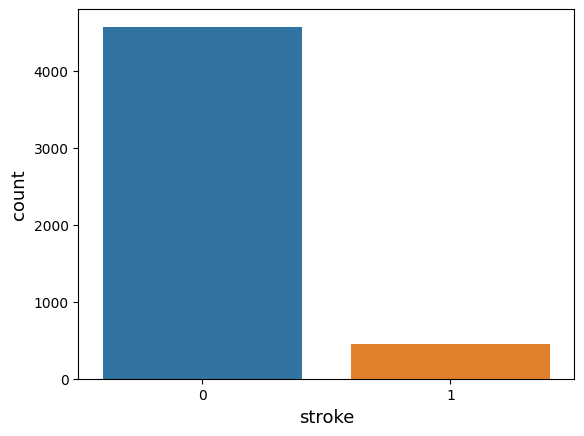

In [ ]:
sns.barplot(x=brain_stroke["stroke"].value_counts().index, y = brain_stroke["stroke"].value_counts().values)
plt.xlabel("stroke", fontsize=13,fontweight="regular")
plt.ylabel("count",fontsize=13,fontweight="regular")

Text(0, 0.5, 'count')

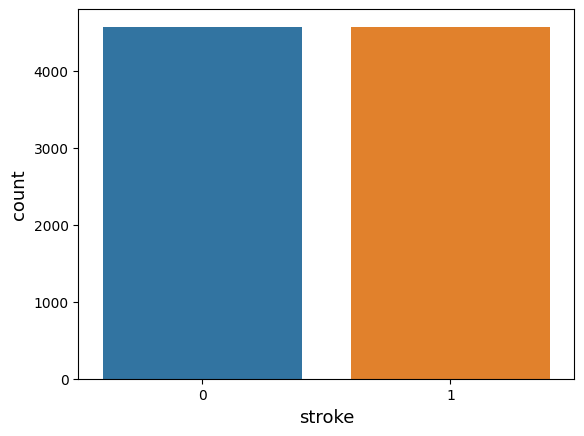

In [ ]:
sns.barplot(x=Y_balanced.value_counts().index, y = Y_balanced.value_counts().values)
plt.xlabel("stroke", fontsize=13,fontweight="regular")
plt.ylabel("count",fontsize=13,fontweight="regular")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_balanced, Y_balanced, stratify = Y_balanced, test_size = 0.25, random_state = 49)

In [ ]:
print (X_balanced.shape, X_train.shape, X_test.shape)

(9144, 12) (6858, 12) (2286, 12)


In [ ]:
print (X_balanced.shape, X_train.shape, X_test.shape)

(9144, 12) (6858, 12) (2286, 12)


In [ ]:
X_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9144 entries, 0 to 9143
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   9144 non-null   int64  
 1   age                      9144 non-null   float64
 2   hypertension             9144 non-null   int64  
 3   heart_disease            9144 non-null   int64  
 4   ever_married             9144 non-null   int64  
 5   Residence_type           9144 non-null   int64  
 6   avg_glucose_level        9144 non-null   float64
 7   bmi                      9144 non-null   float64
 8   work_type_Govt_job       9144 non-null   uint8  
 9   work_type_Private        9144 non-null   uint8  
 10  work_type_Self-employed  9144 non-null   uint8  
 11  work_type_children       9144 non-null   uint8  
dtypes: float64(3), int64(5), uint8(4)
memory usage: 607.3 KB


# **Decision Tree Model**

In [ ]:
dtm = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15)

In [ ]:
dtm.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

**Accuracy score of DT**



In [ ]:
X_train_prediction_dtm = dtm.predict(X_train)
accuracy_score( Y_train,X_train_prediction_dtm,)
print('Accuracy on training data : ', round(accuracy_score(X_train_prediction_dtm, Y_train,)*100,2), '%')

Accuracy on training data :  98.21 %


In [ ]:
X_test_prediction_dtm = dtm.predict(X_test)
accuracy_score(X_test_prediction_dtm, Y_test,)
print('Accuracy on testing data : ', round(accuracy_score(X_test_prediction_dtm, Y_test,)*100,2), '%')

Accuracy on testing data :  94.18 %


**Loss score of DT**

In [ ]:
#loss score of train
print('loss on training data : ', brier_score_loss(Y_train,X_train_prediction_dtm))

loss on training data :  0.017935258092738406


In [ ]:
#loss score of test
print('loss on test data : ', brier_score_loss(Y_test,X_test_prediction_dtm))

loss on test data :  0.05818022747156605


**Precision score of DT**

In [ ]:
#precision score of train
precision_train= precision_score(Y_train,X_train_prediction_dtm)
print("Train precision score: ",precision_train*100,'%')

Train precision score:  96.69491525423729 %


In [ ]:
#precision score of test
precision_test= precision_score(Y_test,X_test_prediction_dtm)
print("Test precision score: ",precision_test*100,'%')

Test precision score:  90.99025974025975 %


**Recall score of DT**

In [ ]:
#recall score of train
recall_score_train= recall_score(Y_train,X_train_prediction_dtm)
print("Train recall score: ",recall_score_train*100,'%')

Train recall score:  99.82502187226596 %


In [ ]:
#recall score of test
recall_score_test= recall_score(Y_test,X_test_prediction_dtm)
print("Test recall score: ",recall_score_test*100,'%')

Test recall score:  98.07524059492565 %


**F1 score of DT**

In [ ]:
#f1 score of train
f1_score_train= f1_score(Y_train,X_train_prediction_dtm)
print("Train f1 score: ",f1_score_train*100,'%')

Train f1 score:  98.23504089539388 %


In [ ]:
#f1 score of test
f1_score_test= f1_score(Y_test,X_test_prediction_dtm)
print("Test f1 score: ",f1_score_test*100,'%')

Test f1 score:  94.40000000000002 %


**Feature importances**

In [ ]:
#importance of feature
dtm.feature_importances_

array([0.01964554, 0.42114976, 0.00416247, 0.00770048, 0.01288079,
       0.02461614, 0.24727136, 0.13277618, 0.0520862 , 0.04368774,
       0.03402333, 0.        ])

In [ ]:
#importance table
df_dtm=pd.DataFrame({"Features_Names":X.columns,"Importances":dtm.feature_importances_})
df_dtm_srt=df_dtm.sort_values(by="Importances",ascending=False)

In [ ]:
df_dtm_srt

,Features_Names,Importances
1,age,0.421150
6,avg_glucose_level,0.247271
7,bmi,0.132776
8,work_type_Govt_job,0.052086
9,work_type_Private,0.043688
10,work_type_Self-employed,0.034023
5,Residence_type,0.024616
0,gender,0.019646
4,ever_married,0.012881
3,heart_disease,0.007700


<BarContainer object of 12 artists>

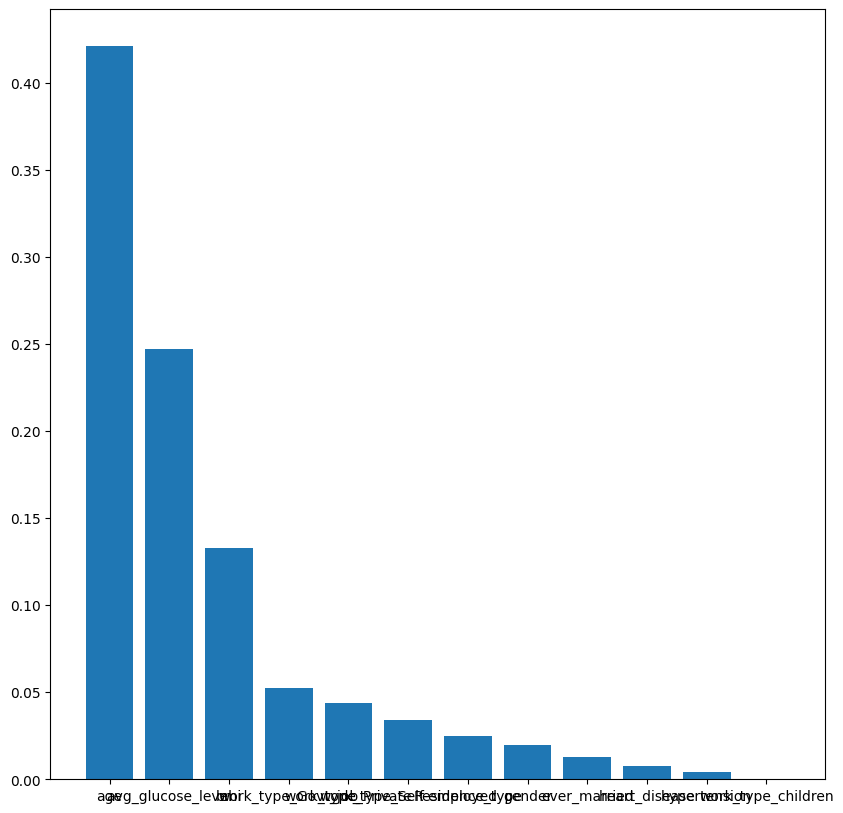

In [ ]:
plt.figure(figsize=[10,10])
plt.bar(df_dtm_srt["Features_Names"],df_dtm_srt["Importances"])


**DT Train Confusion Matrix**

In [ ]:
confusion_matrix(Y_train,X_train_prediction_dtm)

array([[3312,  117],
       [   6, 3423]])

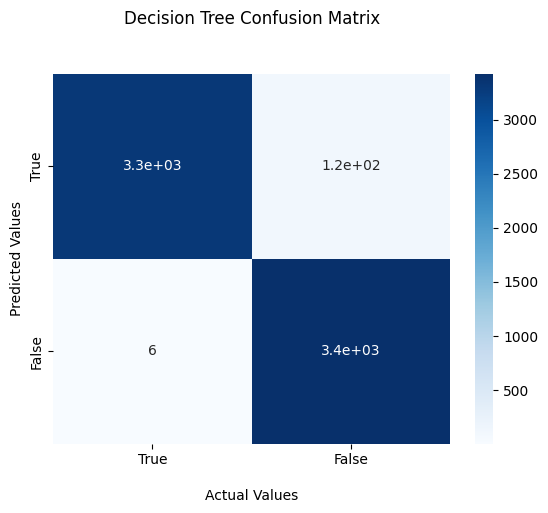

In [ ]:
axdt = sns.heatmap(confusion_matrix(Y_train,X_train_prediction_dtm), annot=True, cmap='Blues')

axdt.set_title('Decision Tree Confusion Matrix\n\n');
axdt.set_xlabel('\nActual Values')
axdt.set_ylabel('Predicted Values');

axdt.xaxis.set_ticklabels(['True','False'])
axdt.yaxis.set_ticklabels(['True','False'])

splt.show()

**DT Test Confusion Matrix**

In [ ]:
confusion_matrix(Y_test,X_test_prediction_dtm)

array([[1032,  111],
       [  22, 1121]])

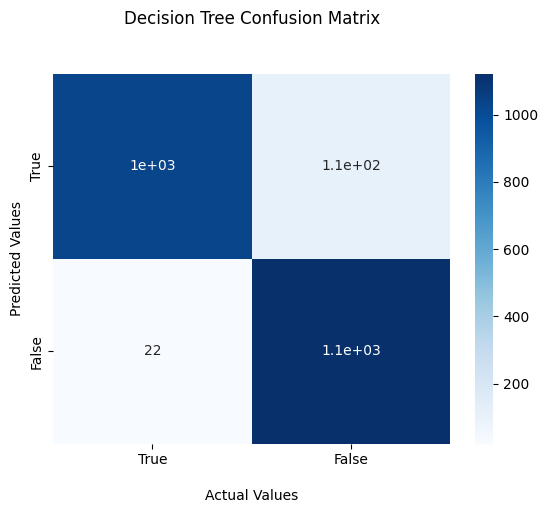

In [ ]:
axdt = sns.heatmap(confusion_matrix(Y_test,X_test_prediction_dtm), annot=True, cmap='Blues')

axdt.set_title('Decision Tree Confusion Matrix\n\n');
axdt.set_xlabel('\nActual Values')
axdt.set_ylabel('Predicted Values');

axdt.xaxis.set_ticklabels(['True','False'])
axdt.yaxis.set_ticklabels(['True','False'])

splt.show()

**Testing Decision Tree**

In [ ]:
#input=(1,67,0,1,1,0,228.69,36.6,0,1,0,0) #stroke
input=(0,22,0,0,0,1,79.81,27.7,0,1,0,0)  #no stroke
input_np=np.asarray(input)
input_rs=input_np.reshape(1,-1)
prd=dtm.predict(input_rs)
if(prd==0):
  print("Patient has not stroke\n")
else:
  print("Patient has stroke\n")


Patient has not stroke



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**DT classification report**

In [ ]:
print(classification_report(Y_test,X_test_prediction_dtm))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1143
           1       0.91      0.98      0.94      1143

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



**Overfit checking for DT**

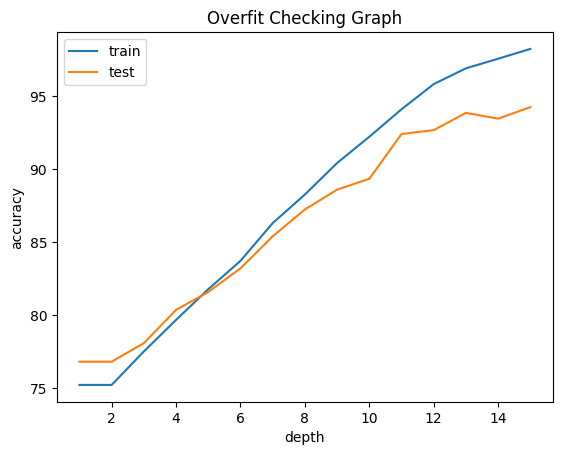

In [ ]:
#overfit checking for DT
max_depth_param=range(1,16,1)
train_acc=[] #list of train accuracy
test_acc=[]  #list of test accuracy
for i in max_depth_param:
    dtm = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    dtm.fit(X_train, Y_train)
    X_train_prediction_dtm = dtm.predict(X_train) #predict with trained value
    train_acc.append(accuracy_score(X_train_prediction_dtm, Y_train,)*100) #accuracy of train in each depth
    X_test_prediction_dtm = dtm.predict(X_test) #predict with test value
    test_acc.append(accuracy_score(X_test_prediction_dtm, Y_test,)*100) #accuracy of train in each depth

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(max_depth_param,train_acc,label="train")
ax.plot(max_depth_param,test_acc,label="test")
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
plt.title('Overfit Checking Graph')
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.legend()
plt.show()

# ***Decision tree Optimise***

In [ ]:
parameters = {'max_depth' : (10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }
dtm1 = DecisionTreeClassifier()

In [ ]:
DT_grid  = GridSearchCV(estimator=dtm1,param_grid=parameters,cv=10,n_jobs=-1,verbose=2)

In [ ]:
DT_grid.fit(X_train, Y_train)
DT_grid.best_estimator_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features='auto')

In [ ]:
DT_Model = DecisionTreeClassifier(max_depth=25, max_features='sqrt', min_samples_split=6)

DT_Model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=25, max_features='sqrt', min_samples_split=6)

In [ ]:
print (f'Train Accuracy - : {DT_Model.score(X_train, Y_train)*100:.3f}')
print (f'Test Accuracy - : {DT_Model.score(X_test, Y_test)*100:.3f}')

Train Accuracy - : 98.659
Test Accuracy - : 93.788


# ***XGB Classifier***

In [ ]:
#colsample_bytree=0.7, gamma=0.0, max_depth=10
#colsample_bytree=0.5, gamma=0.0, max_depth=15, min_child_weight=3
xgb = XGBClassifier(colsample_bytree=0.5, gamma=0.0, max_depth=17, min_child_weight=3)
xgb.fit(X_train.values, Y_train.values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

**Accuracy Score Of XGB**

In [ ]:
#Training accuracy
X_train_prediction_xgb = xgb.predict(X_train.values)
accuracy_score(X_train_prediction_xgb, Y_train.values,)
print('Accuracy on training data : ', round(accuracy_score(X_train_prediction_xgb, Y_train.values,)*100,2), '%')

Accuracy on training data :  99.99 %


In [ ]:
#Testing accuracy
X_test_prediction_xgb = xgb.predict(X_test.values)
accuracy_score(X_test_prediction_xgb, Y_test.values,)
print('Accuracy on testing data : ', round(accuracy_score(X_test_prediction_xgb, Y_test.values,)*100,2), '%')

Accuracy on testing data :  96.63 %


**Loss score of xgb**

In [ ]:
#loss score of train
print('loss on training data : ', brier_score_loss(Y_train,X_train_prediction_xgb))

loss on training data :  0.00014581510644502772


In [ ]:
#loss score of test
print('loss on test data : ', brier_score_loss(Y_test,X_test_prediction_xgb))

loss on test data :  0.0336832895888014


**Precision Score Of XGB**

In [ ]:
#precision score of train
precision_train= precision_score(Y_train.values,X_train_prediction_xgb)
print("Train precision score: ",precision_train*100,'%')

Train precision score:  100.0 %


In [ ]:
#precision score of test
precision_test= precision_score(Y_test.values,X_test_prediction_xgb)
print("Test precision score: ",precision_test*100,'%')

Test precision score:  95.0168918918919 %


**Recall Score Of XGB**

In [ ]:
#recall score of train
recall_score_train= recall_score(Y_train.values,X_train_prediction_xgb)
print("Train recall score: ",recall_score_train*100,'%')

Train recall score:  99.97083697871099 %


In [ ]:
#recall score of test
recall_score_test= recall_score(Y_test.values,X_test_prediction_xgb)
print("Test recall score: ",recall_score_test*100,'%')

Test recall score:  98.4251968503937 %


**F1 Score Of XGB**

In [ ]:
#f1 score of train
f1_score_train= f1_score(Y_train.values,X_train_prediction_xgb)
print("Train f1 score: ",f1_score_train*100,'%')

Train f1 score:  99.9854163628409 %


In [ ]:
#f1 score of test
f1_score_test= f1_score(Y_test.values,X_test_prediction_xgb)
print("Test f1 score: ",f1_score_test*100,'%')

Test f1 score:  96.69101847872798 %


**XGB train confusion matrix**

In [ ]:
#train confusin matrix
confusion_matrix(Y_train.values,X_train_prediction_xgb)

array([[3429,    0],
       [   1, 3428]])

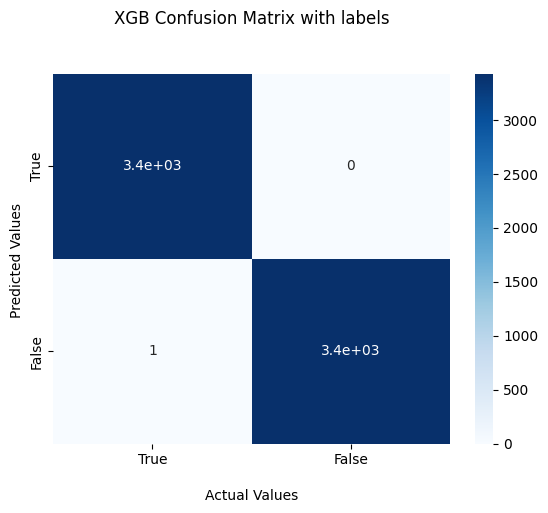

In [ ]:
#train confusin matrix
axxgb = sns.heatmap(confusion_matrix(Y_train,X_train_prediction_xgb), annot=True, cmap='Blues')

axxgb.set_title('XGB Confusion Matrix with labels\n\n');
axxgb.set_xlabel('\nActual Values')
axxgb.set_ylabel('Predicted Values ');

axxgb.xaxis.set_ticklabels(['True','False'])
axxgb.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
splt.show()

**XGB test confusion matrix**

In [ ]:
#test confusin matrix
confusion_matrix(Y_test.values,X_test_prediction_xgb)

array([[1084,   59],
       [  18, 1125]])

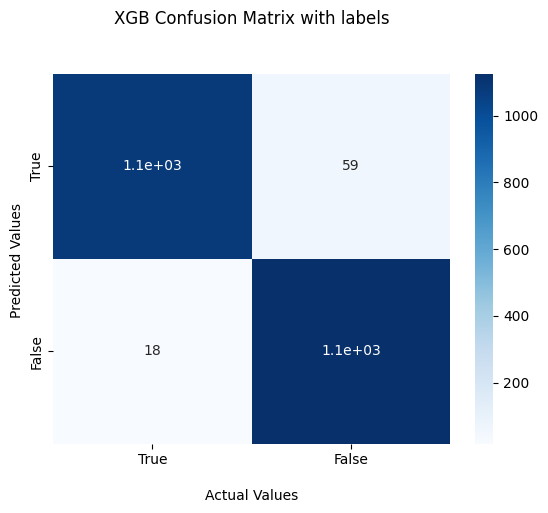

In [ ]:
#test confusin matrix
axxgb = sns.heatmap(confusion_matrix(Y_test,X_test_prediction_xgb), annot=True, cmap='Blues')

axxgb.set_title('XGB Confusion Matrix with labels\n\n');
axxgb.set_xlabel('\nActual Values')
axxgb.set_ylabel('Predicted Values ');

axxgb.xaxis.set_ticklabels(['True','False'])
axxgb.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
splt.show()

**XGB classification report**

In [ ]:
print(classification_report(Y_test,X_test_prediction_xgb))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1143
           1       0.95      0.98      0.97      1143

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



**Testing XGB**

In [ ]:
#input=(1,67,0,1,1,0,228.69,36.6,0,1,0,0) #stroke
input=(0,22,0,0,0,1,79.81,27.7,0,1,0,0)  #no stroke
input_np=np.asarray(input)
input_rs=input_np.reshape(1,-1)
prd=xgb.predict(input_rs)
if(prd==0):
  print("Patient has not stroke\n")
else:
  print("Patient has stroke\n")

Patient has not stroke



**Overfit Checking of XGB**

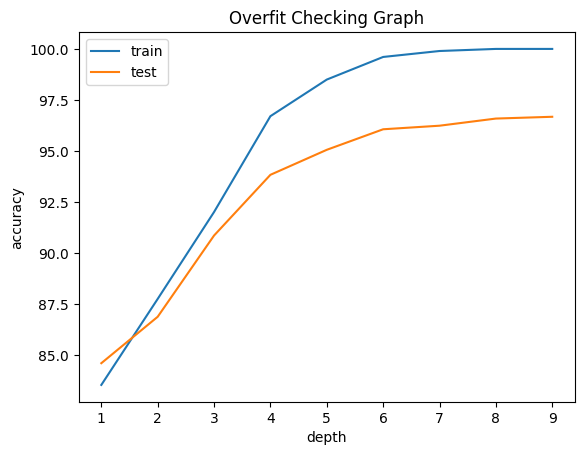

In [ ]:
#overfit checking for XGB
max_depth_param=range(1,10,1)
train_acc=[] #list of train accuracy
test_acc=[]  #list of test accuracy
for i in max_depth_param:
    xgb =  XGBClassifier(colsample_bytree=0.7, gamma=0.0, max_depth=i)
    xgb.fit(X_train.values, Y_train.values)
    X_train_prediction_xgb = xgb.predict(X_train.values) #predict with trained value
    train_acc.append(accuracy_score(X_train_prediction_xgb, Y_train.values,)*100) #accuracy of train in each depth
    X_test_prediction_xgb = xgb.predict(X_test.values) #predict with test value
    test_acc.append(accuracy_score(X_test_prediction_xgb, Y_test.values,)*100) #accuracy of train in each depth

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(max_depth_param,train_acc,label="train")
ax.plot(max_depth_param,test_acc,label="test")
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
plt.title('Overfit Checking Graph')
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.legend()
plt.show()

# ***Random Forest Model***

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
Rclf = RandomForestClassifier(max_depth=18)

In [ ]:
Rclf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=18)

**Accuracy score of RF**

In [ ]:
X_train_prediction_rclf = Rclf.predict(X_train)
accuracy_score(X_train_prediction_rclf, Y_train,)
print('Accuracy on training data : ', round(accuracy_score(X_train_prediction_rclf, Y_train,)*100,2), '%')

Accuracy on training data :  99.93 %


In [ ]:
X_test_prediction_rclf = Rclf.predict(X_test)
accuracy_score(X_test_prediction_rclf, Y_test,)
print('Accuracy on testing data : ', round(accuracy_score(X_test_prediction_rclf, Y_test,)*100,2), '%')

Accuracy on testing data :  97.07 %


**Loss score of RF**

In [ ]:
#loss score of train
print('loss on training data : ', brier_score_loss(Y_train,X_train_prediction_rclf))

loss on training data :  0.0007290755322251386


In [ ]:
#loss score of test
print('loss on test data : ', brier_score_loss(Y_test,X_test_prediction_rclf))

loss on test data :  0.02930883639545057


**Precision Score of RF**



In [ ]:
#precision score of train
precision_train= precision_score(Y_train,X_train_prediction_rclf)
print("Train precision score: ",precision_train*100,'%')

Train precision score:  99.85439720442632 %


In [ ]:
#precision score of test
precision_test= precision_score(Y_test,X_test_prediction_rclf)
print("Test precision score: ",precision_test*100,'%')

Test precision score:  95.5160744500846 %


**Recall Score of RF**

In [ ]:
#recall score of train
recall_score_train= recall_score(Y_train,X_train_prediction_rclf)
print("Train recall score: ",recall_score_train*100,'%')

Train recall score:  100.0 %


In [ ]:
#recall score of test
recall_score_test= recall_score(Y_test,X_test_prediction_rclf)
print("Test recall score: ",recall_score_test*100,'%')

Test recall score:  98.77515310586176 %


**f1 Score of RF**

In [ ]:
#f1 score of train
f1_score_train= f1_score(Y_train,X_train_prediction_rclf)
print("Train f1 score: ",f1_score_train*100,'%')

Train f1 score:  99.9271455631648 %


In [ ]:
#f1 score of test
f1_score_test= f1_score(Y_test,X_test_prediction_rclf)
print("Test f1 score: ",f1_score_test*100,'%')

Test f1 score:  97.11827956989248 %


**RF Train Confusion Matrix**

In [ ]:
#train confusin matrix
predRF = Rclf.predict(X_train)
confusion_matrix(Y_train,predRF)

array([[3424,    5],
       [   0, 3429]])

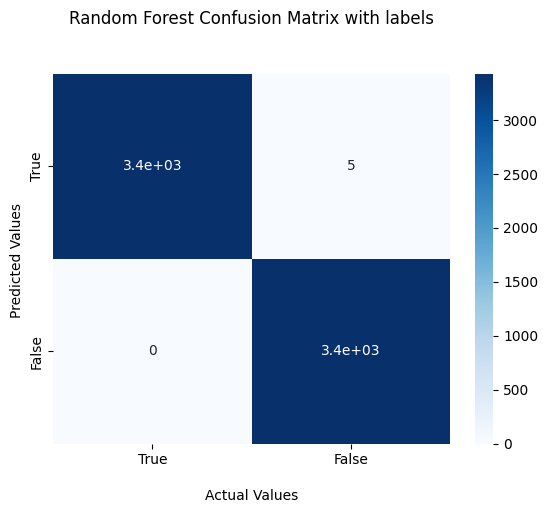

In [ ]:
#train confusin matrix
axrclf = sns.heatmap(confusion_matrix(Y_train,predRF), annot=True, cmap='Blues')

axrclf.set_title('Random Forest Confusion Matrix with labels\n\n');
axrclf.set_xlabel('\nActual Values')
axrclf.set_ylabel('Predicted Values ');

axrclf.xaxis.set_ticklabels(['True','False'])
axrclf.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
splt.show()

**RF Test Confusion Matrix**

In [ ]:
#test confusin matrix
predRF = Rclf.predict(X_test)
confusion_matrix(Y_test,predRF)

array([[1090,   53],
       [  14, 1129]])

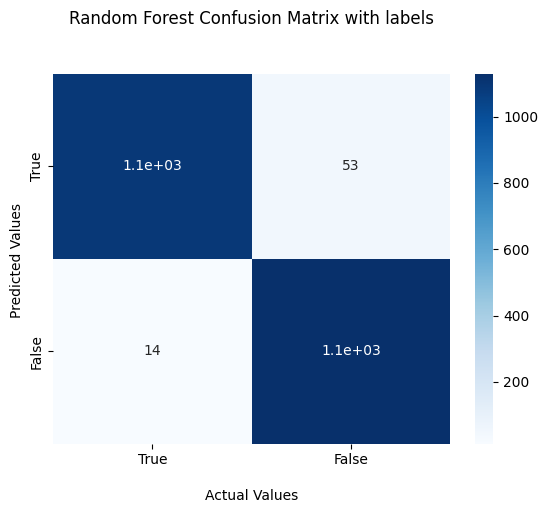

In [ ]:
#test confusin matrix
axrclf = sns.heatmap(confusion_matrix(Y_test,predRF), annot=True, cmap='Blues')

axrclf.set_title('Random Forest Confusion Matrix with labels\n\n');
axrclf.set_xlabel('\nActual Values')
axrclf.set_ylabel('Predicted Values ');

axrclf.xaxis.set_ticklabels(['True','False'])
axrclf.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
splt.show()

**Testing Random Forest**

In [ ]:
#input=(1,67,0,1,1,0,228.69,36.6,0,1,0,0) #stroke
#input=(1,67,0,0,1,0,190.7,36,0,1,0,0) # No stroke
input=(0,22,0,0,0,1,79.81,27.7,0,1,0,0)  #no stroke
input_np=np.asarray(input)
input_rs=input_np.reshape(1,-1)
prd=Rclf.predict(input_rs)
if(prd==0):
  print("Patient has not stroke\n")
else:
  print("Patient has stroke\n")

Patient has not stroke



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**RF classification report**

In [ ]:
print(classification_report(Y_test,X_test_prediction_rclf))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1143
           1       0.96      0.99      0.97      1143

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



**Random Forest Optimization With Random Search CV**

In [ ]:
# Number of trees in random forest
# linspace: Return evenly spaced numbers over a specified interval
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
Rclf1 = RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=Rclf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
# Controls the verbosity: the higher, the more messages
# Number of jobs to run in parallel
### fit the randomized model
rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 230,
 'criterion': 'gini'}

In [ ]:
best_random_grid=rf_randomcv.best_estimator_
# storing the best hyperparameters

In [ ]:
X_train_prediction_rclf = best_random_grid.predict(X_train)
print('Accuracy on training data : ', round(accuracy_score(Y_train, X_train_prediction_rclf)*100,2), '%')

Accuracy on training data :  100.0 %


In [ ]:
X_test_prediction_rclf = best_random_grid.predict(X_test)
print('Accuracy on testing data : ', round(accuracy_score(Y_test, X_test_prediction_rclf)*100,2), '%')

Accuracy on testing data :  97.16 %


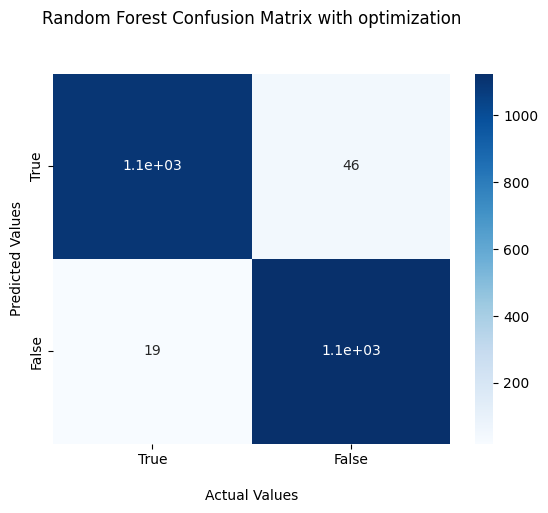

In [ ]:
axdt = sns.heatmap(confusion_matrix(Y_test, X_test_prediction_rclf), annot=True, cmap='Blues')

axdt.set_title('Random Forest Confusion Matrix with optimization\n\n');
axdt.set_xlabel('\nActual Values')
axdt.set_ylabel('Predicted Values');

axdt.xaxis.set_ticklabels(['True','False'])
axdt.yaxis.set_ticklabels(['True','False'])

splt.show()

In [ ]:
print(classification_report(Y_test, X_test_prediction_rclf))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1143
           1       0.96      0.98      0.97      1143

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



**Explainable AI**

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['0', '1'], # Check your class names in the CSV file. It should be 1, 2, 3, 4, 5 I think
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X_test.iloc[1],
    predict_fn=Rclf.predict_proba
)

exp.show_in_notebook(show_table=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=e4708869a016ab355056bdd430b2d93ed03cd8d584fc4c6f72a42ef4c8f446d6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **KNN Model**

In [ ]:
#model implimentation
knn = KNeighborsClassifier(n_neighbors = 3, p=3)

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3, p=3)

**Accuracy Score of KNN**

In [ ]:
X_train_prediction_knn = knn.predict(X_train)
accuracy_score(X_train_prediction_knn, Y_train,)
print('Accuracy on training data : ', round(accuracy_score(X_train_prediction_knn, Y_train,)*100,2), '%')

Accuracy on training data :  95.32 %


In [ ]:
X_test_prediction_knn = knn.predict(X_test)
accuracy_score(X_test_prediction_knn, Y_test,)
print('Accuracy on testing data : ', round(accuracy_score(X_test_prediction_knn, Y_test,)*100,2), '%')

Accuracy on testing data :  92.87 %


**Loss score of KNN**

In [ ]:
#loss score of train
print('loss on training data : ', brier_score_loss(Y_train,X_train_prediction_knn))

loss on training data :  0.046806649168853895


In [ ]:
#loss score of test
print('loss on test data : ', brier_score_loss(Y_test,X_test_prediction_knn))

loss on test data :  0.07130358705161854


**Precision Score of KNN**

In [ ]:
#precision score of train
precision_train= precision_score(Y_train,X_train_prediction_knn)
print("Train precision score: ",precision_train*100,'%')

Train precision score:  91.88679245283019 %


In [ ]:
#precision score of test
precision_test= precision_score(Y_test,X_test_prediction_knn)
print("Test precision score: ",precision_test*100,'%')

Test precision score:  88.04347826086956 %


**Recall Score of KNN**

In [ ]:
#recall score of train
recall_score_train= recall_score(Y_train,X_train_prediction_knn)
print("Train recall score: ",recall_score_train*100,'%')

Train recall score:  99.41673957421989 %


In [ ]:
#recall score of test
recall_score_test= recall_score(Y_test,X_test_prediction_knn)
print("Test recall score: ",recall_score_test*100,'%')

Test recall score:  99.21259842519686 %


**F1 score of KNN**

In [ ]:
#f1 score of train
f1_score_train= f1_score(Y_train,X_train_prediction_knn)
print("Train f1 score: ",f1_score_train*100,'%')

Train f1 score:  95.50357192884158 %


In [ ]:
#f1 score of test
f1_score_test= f1_score(Y_test,X_test_prediction_knn)
print("Test f1 score: ",f1_score_test*100,'%')

Test f1 score:  93.29494035376389 %


**Confusion matrix of train**

In [ ]:
confusion_matrix(Y_train,X_train_prediction_knn)

array([[3128,  301],
       [  20, 3409]])

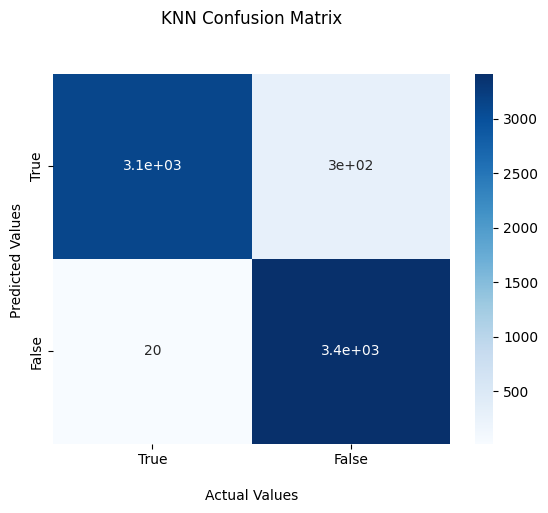

In [ ]:
axknn = sns.heatmap(confusion_matrix(Y_train,X_train_prediction_knn), annot=True, cmap='Blues')

axknn.set_title('KNN Confusion Matrix\n\n');
axknn.set_xlabel('\nActual Values')
axknn.set_ylabel('Predicted Values ');

axknn.xaxis.set_ticklabels(['True','False'])
axknn.yaxis.set_ticklabels(['True','False'])

splt.show()

**Confusion matrix of test**

In [ ]:
confusion_matrix(Y_test,X_test_prediction_knn)

array([[ 989,  154],
       [   9, 1134]])

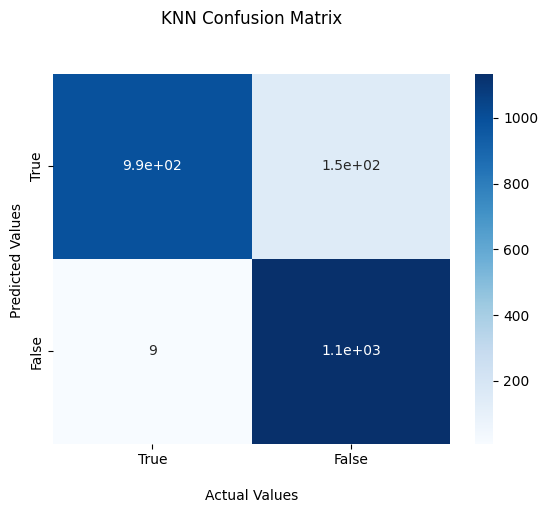

In [ ]:
axknn = sns.heatmap(confusion_matrix(Y_test,X_test_prediction_knn), annot=True, cmap='Blues')

axknn.set_title('KNN Confusion Matrix\n\n');
axknn.set_xlabel('\nActual Values')
axknn.set_ylabel('Predicted Values ');

axknn.xaxis.set_ticklabels(['True','False'])
axknn.yaxis.set_ticklabels(['True','False'])

splt.show()

In [ ]:
print(classification_report(Y_test,X_test_prediction_knn))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1143
           1       0.88      0.99      0.93      1143

    accuracy                           0.93      2286
   macro avg       0.94      0.93      0.93      2286
weighted avg       0.94      0.93      0.93      2286



**Testing Of KNN Model**

In [ ]:
input=(1,67,0,1,1,0,228.69,36.6,0,1,0,0) #stroke
#input=(0,22,0,0,0,1,79.81,27.7,0,1,0,0)  #no stroke
input_np=np.asarray(input)
input_rs=input_np.reshape(1,-1)
prd=knn.predict(input_rs)
if(prd==0):
  print("Patient has not stroke\n")
else:
  print("Patient has stroke\n")

Patient has stroke



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# ***Neural Network Model***

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [ ]:
#for DNN seperate spliting
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_balanced, Y_balanced, stratify = Y_balanced, test_size = 0.25, random_state = 49)
sclr=StandardScaler()
X_train_std=sclr.fit_transform(X1_train)
X_test_std=sclr.transform(X1_test)

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(12,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(30, activation='sigmoid'),
    keras.layers.Dense(30, activation='sigmoid'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(20, activation='sigmoid'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_std, Y1_train, validation_split=0.20, epochs=1105)

Epoch 1/1105
172/172 [==============================] - 4s 5ms/step - loss: 0.6332 - accuracy: 0.6240 - val_loss: 0.4399 - val_accuracy: 0.8039
Epoch 2/1105
172/172 [==============================] - 0s 3ms/step - loss: 0.4070 - accuracy: 0.8101 - val_loss: 0.3723 - val_accuracy: 0.8280
Epoch 3/1105
172/172 [==============================] - 1s 5ms/step - loss: 0.3767 - accuracy: 0.8246 - val_loss: 0.3519 - val_accuracy: 0.8375
Epoch 4/1105
172/172 [==============================] - 1s 6ms/step - loss: 0.3628 - accuracy: 0.8308 - val_loss: 0.3445 - val_accuracy: 0.8397
Epoch 5/1105
172/172 [==============================] - 1s 6ms/step - loss: 0.3555 - accuracy: 0.8339 - val_loss: 0.3382 - val_accuracy: 0.8382
Epoch 6/1105
172/172 [==============================] - 1s 4ms/step - loss: 0.3485 - accuracy: 0.8390 - val_loss: 0.3381 - val_accuracy: 0.8469
Epoch 7/1105
172/172 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.8389 - val_loss: 0.3353 - val_accuracy:

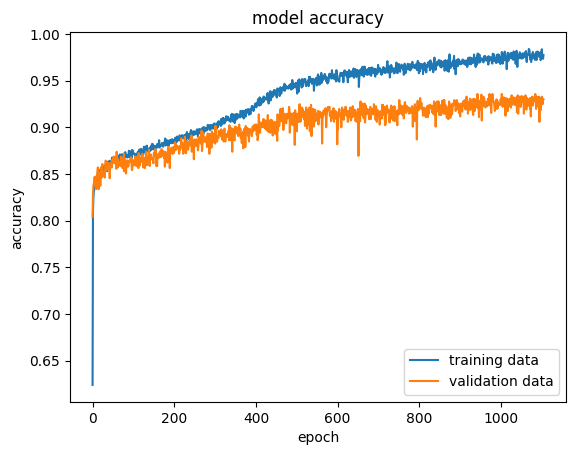

In [ ]:
#visualization of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

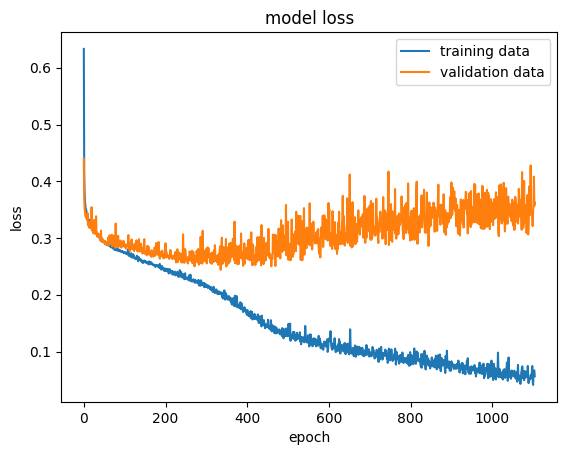

In [ ]:
#visualization of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
#Accuracy score of NN
loss, accuracy = model.evaluate(X_test_std, Y1_test)
print(accuracy*100)

72/72 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.9296
92.95713305473328


In [ ]:
Y1_pred=model.predict(X_test_std)

72/72 [==============================] - 0s 1ms/step


In [ ]:
#converstion of lebel
Y1_pred_lebel=[np.argmax(i) for i in Y1_pred]

**Neural Network Test Confusion Matrix**

In [ ]:
#neural network test confusion matrix
confusion_matrix(Y1_pred_lebel,Y1_test)

array([[1023,   41],
       [ 120, 1102]])

In [ ]:
#neural network test confusion matrix
confusion_matrix(Y1_test,Y1_pred_lebel)

array([[1023,  120],
       [  41, 1102]])

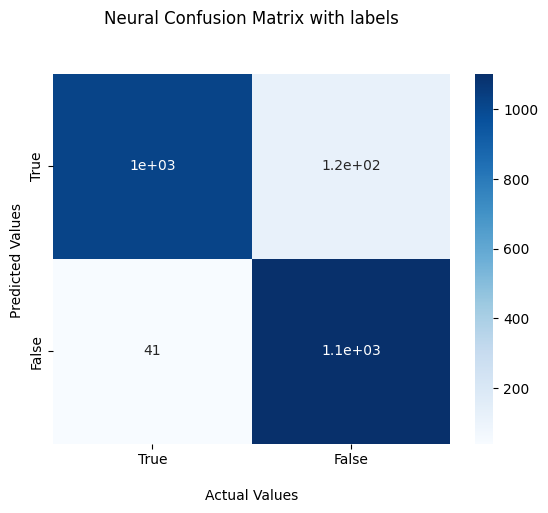

In [ ]:
#test confusin matrix
axxgb = sns.heatmap(confusion_matrix(Y1_test,Y1_pred_lebel), annot=True, cmap='Blues')

axxgb.set_title('Neural Confusion Matrix with labels\n\n');
axxgb.set_xlabel('\nActual Values')
axxgb.set_ylabel('Predicted Values ');

axxgb.xaxis.set_ticklabels(['True','False'])
axxgb.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
splt.show()

**Precision score of NN**


In [ ]:
#precision score of test
precision_test= precision_score(Y1_pred_lebel,Y1_test)
print("Test precision score: ",precision_test*100,'%')

Test precision score:  96.41294838145232 %


**Recall score of NN**


In [ ]:
#recall score of test
recall_score_test= recall_score(Y1_pred_lebel,Y1_test)
print("Test recall score: ",recall_score_test*100,'%')

Test recall score:  90.18003273322422 %


**F1 score score of NN**



In [ ]:
#f1 score of test
f1_score_test= f1_score(Y1_pred_lebel,Y1_test)
print("Test f1 score: ",f1_score_test*100,'%')

Test f1 score:  93.1923890063425 %


**Loss score of NN**

In [ ]:
#loss score of test
print('loss on test data : ', brier_score_loss(Y1_pred_lebel,Y1_test))

loss on test data :  0.07042869641294838


**Classification report of NN**



In [ ]:
#classification report of test
print(classification_report(Y1_pred_lebel,Y1_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1064
           1       0.96      0.90      0.93      1222

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286



# **AdaBoost with Decision Tree as best_estimator**

In [ ]:
#best_estimator
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 14)

In [ ]:
ada_dt=AdaBoostClassifier(n_estimators=100,base_estimator=dt,learning_rate=1)
ada_dt.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=14),
                   learning_rate=1, n_estimators=100)

**Accuracy**

In [ ]:
X_train_prediction_ada_dt= ada_dt.predict(X_train)
accuracy_score(X_train_prediction_ada_dt, Y_train,)
print('Accuracy on training data : ', round(accuracy_score(X_train_prediction_ada_dt, Y_train,)*100,2), '%')

Accuracy on training data :  100.0 %


In [ ]:
X_test_prediction_ada_dt = ada_dt.predict(X_test)
accuracy_score(X_test_prediction_ada_dt, Y_test,)
print('Accuracy on testing data : ', round(accuracy_score(X_test_prediction_ada_dt, Y_test,)*100,2), '%')

Accuracy on testing data :  97.86 %


**Loss score of AdaBoost_DT**

In [ ]:
#loss score of train
print('loss on training data : ', brier_score_loss(Y_train,X_train_prediction_ada_dt))

loss on training data :  0.0


In [ ]:
#loss score of test
print('loss on test data : ', brier_score_loss(Y_test,X_test_prediction_ada_dt))

loss on test data :  0.021434820647419073


**Precision score of AdaBoost_DT**

In [ ]:
#precision score of train
precision_train= precision_score(Y_train,X_train_prediction_ada_dt)
print("Train precision score: ",precision_train*100,'%')

Train precision score:  100.0 %


In [ ]:
#precision score of test
precision_test= precision_score(Y_test,X_test_prediction_ada_dt)
print("Test precision score: ",precision_test*100,'%')

Test precision score:  97.07401032702238 %


**Recall score of AdaBoost_DT**

In [ ]:
#recall score of train
recall_score_train= recall_score(Y_train,X_train_prediction_ada_dt)
print("Train recall score: ",recall_score_train*100,'%')

Train recall score:  100.0 %


In [ ]:
#recall score of test
recall_score_test= recall_score(Y_test,X_test_prediction_ada_dt)
print("Test recall score: ",recall_score_test*100,'%')

Test recall score:  98.68766404199475 %


**F1 score of AdaBoost_DT**

In [ ]:
#f1 score of train
f1_score_train= f1_score(Y_train,X_train_prediction_ada_dt)
print("Train f1 score: ",f1_score_train*100,'%')

Train f1 score:  100.0 %


In [ ]:
#f1 score of test
f1_score_test= f1_score(Y_test,X_test_prediction_ada_dt)
print("Test f1 score: ",f1_score_test*100,'%')

Test f1 score:  97.87418655097613 %


**AdaBoost_DT Train Confusion Matrix**

In [ ]:
confusion_matrix(Y_train,X_train_prediction_ada_dt)

array([[3429,    0],
       [   0, 3429]])

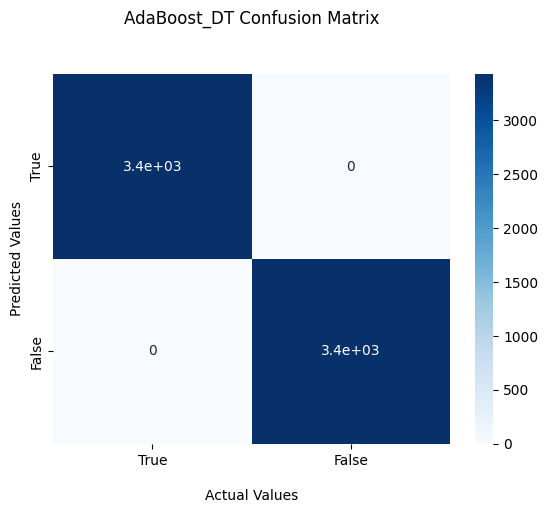

In [ ]:
axdt = sns.heatmap(confusion_matrix(Y_train,X_train_prediction_ada_dt), annot=True, cmap='Blues')

axdt.set_title('AdaBoost_DT Confusion Matrix\n\n');
axdt.set_xlabel('\nActual Values')
axdt.set_ylabel('Predicted Values');

axdt.xaxis.set_ticklabels(['True','False'])
axdt.yaxis.set_ticklabels(['True','False'])

splt.show()

**AdaBoost_DT Test Confusion Matrix**

In [ ]:
confusion_matrix(Y_test,X_test_prediction_ada_dt)

array([[1109,   34],
       [  15, 1128]])

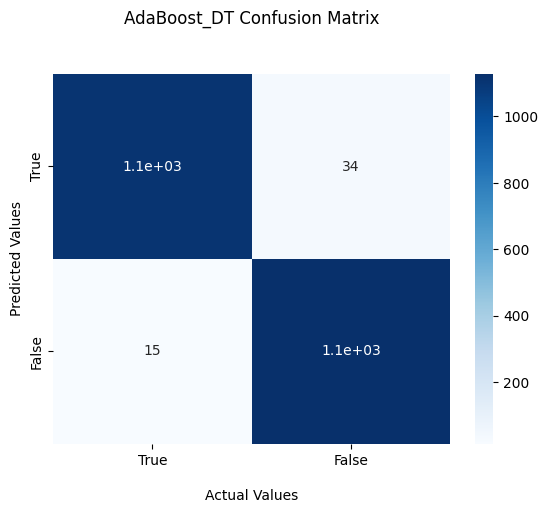

In [ ]:
axdt = sns.heatmap(confusion_matrix(Y_test,X_test_prediction_ada_dt), annot=True, cmap='Blues')

axdt.set_title('AdaBoost_DT Confusion Matrix\n\n');
axdt.set_xlabel('\nActual Values')
axdt.set_ylabel('Predicted Values');

axdt.xaxis.set_ticklabels(['True','False'])
axdt.yaxis.set_ticklabels(['True','False'])

splt.show()

In [ ]:
input=(1,67,0,1,1,0,228.69,36.6,0,1,0,0) #stroke
#input=(0,22,0,0,0,1,79.81,27.7,0,1,0,0)  #no stroke
input_np=np.asarray(input)
input_rs=input_np.reshape(1,-1)
prd=ada_dt.predict(input_rs)
if(prd==0):
  print("Patient has not stroke\n")
else:
  print("Patient has stroke\n")


Patient has stroke



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


**AdaBoost_DT classification report**

In [ ]:
print(classification_report(Y_test,X_test_prediction_ada_dt))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1143
           1       0.97      0.99      0.98      1143

    accuracy                           0.98      2286
   macro avg       0.98      0.98      0.98      2286
weighted avg       0.98      0.98      0.98      2286



# **AdaBoost with Random Forest as best_estimator**

In [ ]:
#best_estimator
Rf = RandomForestClassifier(max_depth=12)

In [ ]:
ada_rf=AdaBoostClassifier(n_estimators=80,base_estimator=Rf,learning_rate=0.9)
ada_rf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=12),
                   learning_rate=0.9, n_estimators=80)

**Accuracy**

In [ ]:
X_train_prediction_ada_rf= ada_rf.predict(X_train)
accuracy_score(X_train_prediction_ada_rf, Y_train,)
print('Accuracy on training data : ', round(accuracy_score(X_train_prediction_ada_rf, Y_train,)*100,2), '%')

Accuracy on training data :  99.93 %


In [ ]:
X_test_prediction_ada_rf = ada_rf.predict(X_test)
accuracy_score(X_test_prediction_ada_rf, Y_test,)
print('Accuracy on testing data : ', round(accuracy_score(X_test_prediction_ada_rf, Y_test,)*100,2), '%')

Accuracy on testing data :  97.16 %


**Loss score of AdaBoost_RF**

In [ ]:
#loss score of train
print('loss on training data : ', brier_score_loss(Y_train,X_train_prediction_ada_rf))

loss on training data :  0.0007290755322251386


In [ ]:
#loss score of test
print('loss on test data : ', brier_score_loss(Y_test,X_test_prediction_ada_rf))

loss on test data :  0.0284339457567804


**Precision score of AdaBoost_RF**

In [ ]:
#precision score of train
precision_train= precision_score(Y_train,X_train_prediction_ada_rf)
print("Train precision score: ",precision_train*100,'%')

Train precision score:  99.85439720442632 %


In [ ]:
#precision score of test
precision_test= precision_score(Y_test,X_test_prediction_ada_rf)
print("Test precision score: ",precision_test*100,'%')

Test precision score:  95.9114139693356 %


**Recall score of AdaBoost_RF**

In [ ]:
#recall score of train
recall_score_train= recall_score(Y_train,X_train_prediction_ada_rf)
print("Train recall score: ",recall_score_train*100,'%')

Train recall score:  100.0 %


In [ ]:
#recall score of test
recall_score_test= recall_score(Y_test,X_test_prediction_ada_rf)
print("Test recall score: ",recall_score_test*100,'%')

Test recall score:  98.51268591426073 %


**F1 score of AdaBoost_RF**

In [ ]:
#f1 score of train
f1_score_train= f1_score(Y_train,X_train_prediction_ada_rf)
print("Train f1 score: ",f1_score_train*100,'%')

Train f1 score:  99.9271455631648 %


In [ ]:
#f1 score of test
f1_score_test= f1_score(Y_test,X_test_prediction_ada_rf)
print("Test f1 score: ",f1_score_test*100,'%')

Test f1 score:  97.19464825205007 %


**AdaBoost_RF Train Confusion Matrix**

In [ ]:
confusion_matrix(Y_train,X_train_prediction_ada_rf)

array([[3424,    5],
       [   0, 3429]])

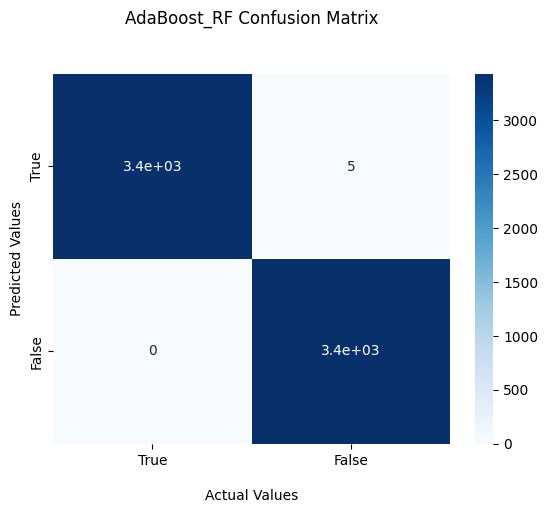

In [ ]:
axdt = sns.heatmap(confusion_matrix(Y_train,X_train_prediction_ada_rf), annot=True, cmap='Blues')

axdt.set_title('AdaBoost_RF Confusion Matrix\n\n');
axdt.set_xlabel('\nActual Values')
axdt.set_ylabel('Predicted Values');

axdt.xaxis.set_ticklabels(['True','False'])
axdt.yaxis.set_ticklabels(['True','False'])

splt.show()

**AdaBoost_RF Test Confusion Matrix**

In [ ]:
confusion_matrix(Y_test,X_test_prediction_ada_rf)

array([[1095,   48],
       [  17, 1126]])

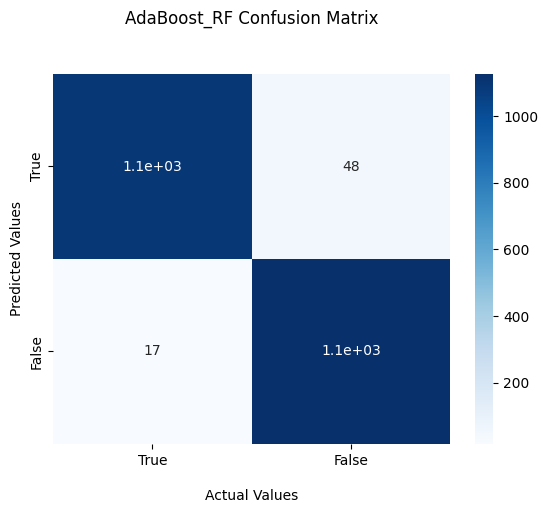

In [ ]:
axdt = sns.heatmap(confusion_matrix(Y_test,X_test_prediction_ada_rf), annot=True, cmap='Blues')

axdt.set_title('AdaBoost_RF Confusion Matrix\n\n');
axdt.set_xlabel('\nActual Values')
axdt.set_ylabel('Predicted Values');

axdt.xaxis.set_ticklabels(['True','False'])
axdt.yaxis.set_ticklabels(['True','False'])

splt.show()

In [ ]:
input=(1,67,0,1,1,0,228.69,36.6,0,1,0,0) #stroke
#input=(0,22,0,0,0,1,79.81,27.7,0,1,0,0)  #no stroke
input_np=np.asarray(input)
input_rs=input_np.reshape(1,-1)
prd=ada_rf.predict(input_rs)
if(prd==0):
  print("Patient has not stroke\n")
else:
  print("Patient has stroke\n")


Patient has stroke



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


**AdaBoost_RF classification report**

In [ ]:
print(classification_report(Y_test,X_test_prediction_ada_rf))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1143
           1       0.96      0.99      0.97      1143

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



# **Gradiant Boosting Classifier**

In [ ]:
gb=GradientBoostingClassifier(max_depth=12,n_estimators=85,learning_rate=0.9)
gb.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.9, max_depth=12, n_estimators=85)

**Accuracy**

In [ ]:
X_train_prediction_gb= gb.predict(X_train)
accuracy_score(X_train_prediction_gb, Y_train,)
print('Accuracy on training data : ', round(accuracy_score(X_train_prediction_gb, Y_train,)*100,2), '%')

Accuracy on training data :  100.0 %


In [ ]:
X_test_prediction_gb = gb.predict(X_test)
accuracy_score(X_test_prediction_gb, Y_test,)
print('Accuracy on testing data : ', round(accuracy_score(X_test_prediction_gb, Y_test,)*100,2), '%')

Accuracy on testing data :  97.64 %


**Loss score of GB**

In [ ]:
#loss score of train
print('loss on training data : ', brier_score_loss(Y_train,X_train_prediction_gb))

loss on training data :  0.0


In [ ]:
#loss score of test
print('loss on test data : ', brier_score_loss(Y_test,X_test_prediction_gb))

loss on test data :  0.023622047244094488


**Precision score of GB**

In [ ]:
#precision score of train
precision_train= precision_score(Y_train,X_train_prediction_gb)
print("Train precision score: ",precision_train*100,'%')

Train precision score:  100.0 %


In [ ]:
#precision score of test
precision_test= precision_score(Y_test,X_test_prediction_gb)
print("Test precision score: ",precision_test*100,'%')

Test precision score:  96.89922480620154 %


**Recall score of GB**

In [ ]:
#recall score of train
recall_score_train= recall_score(Y_train,X_train_prediction_gb)
print("Train recall score: ",recall_score_train*100,'%')

Train recall score:  100.0 %


In [ ]:
#recall score of test
recall_score_test= recall_score(Y_test,X_test_prediction_gb)
print("Test recall score: ",recall_score_test*100,'%')

Test recall score:  98.4251968503937 %


**F1 score of GB**

In [ ]:
#f1 score of train
f1_score_train= f1_score(Y_train,X_train_prediction_gb)
print("Train f1 score: ",f1_score_train*100,'%')

Train f1 score:  100.0 %


In [ ]:
#f1 score of test
f1_score_test= f1_score(Y_test,X_test_prediction_gb)
print("Test f1 score: ",f1_score_test*100,'%')

Test f1 score:  97.65625 %


**GB Train Confusion Matrix**

In [ ]:
confusion_matrix(Y_train,X_train_prediction_gb)

array([[3429,    0],
       [   0, 3429]])

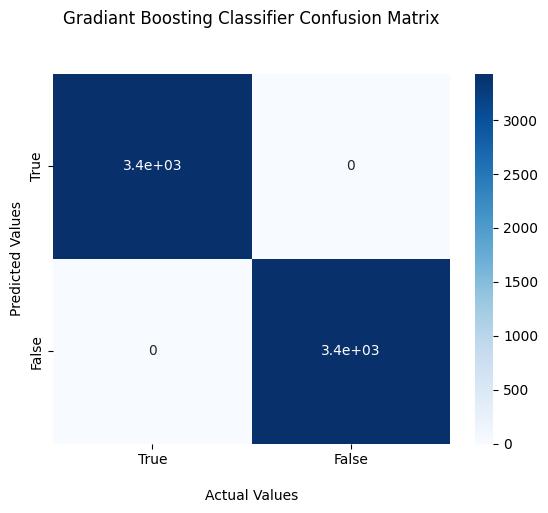

In [ ]:
axdt = sns.heatmap(confusion_matrix(Y_train,X_train_prediction_gb), annot=True, cmap='Blues')

axdt.set_title('Gradiant Boosting Classifier Confusion Matrix\n\n');
axdt.set_xlabel('\nActual Values')
axdt.set_ylabel('Predicted Values');

axdt.xaxis.set_ticklabels(['True','False'])
axdt.yaxis.set_ticklabels(['True','False'])

splt.show()

**GB Test Confusion Matrix**

In [ ]:
confusion_matrix(Y_test,X_test_prediction_gb)

array([[1107,   36],
       [  18, 1125]])

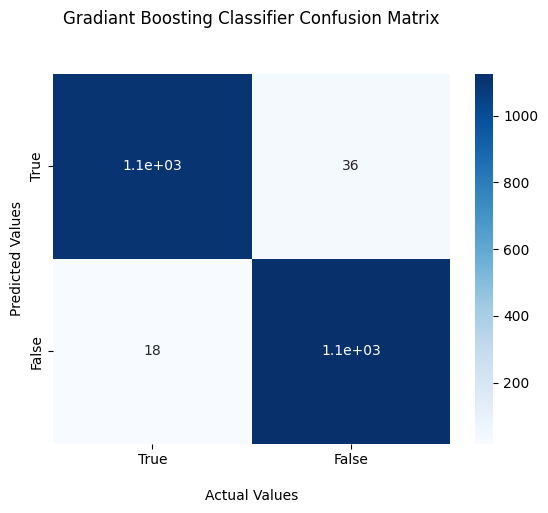

In [ ]:
axdt = sns.heatmap(confusion_matrix(Y_test,X_test_prediction_gb), annot=True, cmap='Blues')

axdt.set_title('Gradiant Boosting Classifier Confusion Matrix\n\n');
axdt.set_xlabel('\nActual Values')
axdt.set_ylabel('Predicted Values');

axdt.xaxis.set_ticklabels(['True','False'])
axdt.yaxis.set_ticklabels(['True','False'])

splt.show()

In [ ]:
input=(1,67,0,1,1,0,228.69,36.6,0,1,0,0) #stroke
#input=(0,22,0,0,0,1,79.81,27.7,0,1,0,0)  #no stroke
input_np=np.asarray(input)
input_rs=input_np.reshape(1,-1)
prd=gb.predict(input_rs)
if(prd==0):
  print("Patient has not stroke\n")
else:
  print("Patient has stroke\n")


Patient has stroke



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


**GB classification report**

In [ ]:
print(classification_report(Y_test,X_test_prediction_gb))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1143
           1       0.97      0.98      0.98      1143

    accuracy                           0.98      2286
   macro avg       0.98      0.98      0.98      2286
weighted avg       0.98      0.98      0.98      2286



# **Voting Classifier**

In [ ]:
vc=VotingClassifier([("adaDt: ",ada_dt),("xgb: ",xgb),("rclf: ",Rclf)],voting="hard")
vc.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('adaDt: ',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                       max_depth=14),
                                                 learning_rate=1,
                                                 n_estimators=100)),
                             ('xgb: ',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            e...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=9,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('rclf: ', RandomForestClassifier(max_depth=18))])

In [ ]:
X_train_prediction_vc = vc.predict(X_train)
accuracy_score(X_train_prediction_vc, Y_train,)
print('Accuracy on training data : ', round(accuracy_score(X_train_prediction_vc, Y_train,)*100,2), '%')

Accuracy on training data :  100.0 %


In [ ]:
X_test_prediction_vc = vc.predict(X_test)
accuracy_score(X_test_prediction_vc, Y_test,)
print('Accuracy on testing data : ', round(accuracy_score(X_test_prediction_vc, Y_test,)*100,2), '%')

Accuracy on testing data :  97.46 %
